In [1]:
#!pip install numpy
#!pip install gym
#!pip install -e gym-zhed

In [2]:
import gym
import gym_zhed
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
level = 5
env = gym.make('zhedLevel' + str(level) + '-v0')
env.render()

Environment initialized
|   |   | 2 |   |   | G | 
|   |   |   |   |   |   | 
| 2 |   |   |   |   |   | 
|   | 1 |   | 2 |   |   | 



In [4]:
state_size = env.observation_space.n
action_size = env.action_space.n
print(f'Action size: {action_size}; State size: {state_size}')

Action size: 16; State size: 6145


In [5]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# @hyperparameters
total_episodes = 50000      # Total episodes
learning_rate = 0.01        # Learning rate
max_steps = 100             # Max steps per episode
gamma = 0.99                # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.1            # Minimum exploration probability 
decay_rate = 0.001             # Exponential decay rate for exploration prob

In [7]:
rewards = []

for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    #print(f'First state: {state}')
    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0, 1)
    
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state, :]) #exploitation
        else:
            action = env.action_space.sample() #exploration
        
        new_state, reward, done, info = env.step(action) #take action and observe results
        #print(f'new_state: {new_state}; reward: {reward}; done: {done}; info: {info}')

        #updating the table using Bellman Equation
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        #cumulative rewards until now
        total_rewards = total_rewards + reward

        state = new_state
        if done == True:
            #print('Done')
            break

    episode += 1
    #reducing exploration rate
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards.append(total_rewards)

print("Score over time: " +  str(sum(rewards) / total_episodes))
print(qtable)
print(epsilon)

Score over time: 128.3166
[[ 874.03232316   -5.83652362   -7.94985151 ...  -24.66322638
   871.63070773  -49.93146163]
 [ -56.89915349  -56.47315338  -54.53476982 ...  -39.6576486
   -30.07423813  -30.08057751]
 [ -46.56216249  -46.44803921  -46.53102129 ... -141.10629298
   -98.71681676 -133.73148053]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
0.1


In [8]:
state = env.reset()
step = 0
done = False
env.render()
    
for step in range(max_steps):
    action = np.argmax(qtable[state,:])

    new_state, reward, done, info = env.step(action)

    env.render()
        
    state = new_state
    if done:
        break

|   |   | 2 |   |   | G | 
|   |   |   |   |   |   | 
| 2 |   |   |   |   |   | 
|   | 1 |   | 2 |   |   | 

|   |   | 2 |   |   | G | 
|   |   |   |   |   |   | 
| 2 | X |   |   |   |   | 
|   | X |   | 2 |   |   | 

|   |   | 2 |   |   | G | 
|   |   |   |   |   |   | 
| X | X | X | X |   |   | 
|   | X |   | 2 |   |   | 

|   |   | 2 | X |   | G | 
|   |   |   | X |   |   | 
| X | X | X | X |   |   | 
|   | X |   | X |   |   | 

|   |   | X | X | X | X | 
|   |   |   | X |   |   | 
| X | X | X | X |   |   | 
|   | X |   | X |   |   | 



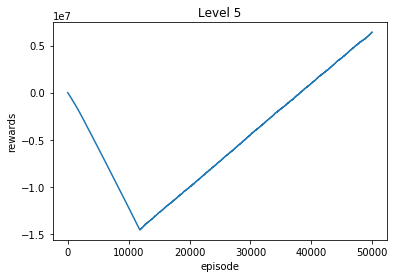

In [9]:
x_axis = [episode for episode in range(total_episodes)]

y_axis = []
acc = 0
for reward in rewards:
    acc += reward
    y_axis.append(acc)

plt.title('Level ' + str(level))
plt.xlabel('episode')
plt.ylabel('rewards')
plt.plot(x_axis, y_axis)
plt.savefig('graphs/level' + str(level) + '-Q.png')